# Análise de Crédito

## Definição dos Atributos

Identificacao: Um identificador único para cada cliente, numérico e sequencial (de 1 a 1000).

Idade: A idade do cliente em anos, variando entre 18 e 70 anos. Este campo contém aproximadamente 5% de valores nulos para simular dados ausentes.

Renda_Anual: A renda anual do cliente em reais, variando entre RS 80.000,00 e RS 500.000,00, com duas casas decimais. Valores extremos (outliers) foram introduzidos para simular rendas anormalmente altas em aproximadamente 2% dos registros. Esse campo também inclui aproximadamente 5% de valores nulos.

Valor_Emprestimo: O valor solicitado do empréstimo em reais, variando entre RS 200.000,00 e RS 800.000,00, com duas casas decimais. Outliers foram introduzidos, onde alguns valores foram reduzidos drasticamente para simular valores de empréstimos anormalmente baixos.

Duracao_Emprestimo: A duração do empréstimo em meses, variando entre 12 e 60 meses. Esse campo representa a quantidade de meses que o cliente tem para quitar o empréstimo.

Inadimplencias_Anteriores: Número de inadimplências anteriores registradas pelo cliente, variando de 0 a 4. Esse campo representa o histórico de inadimplências, indicando o número de vezes que o cliente não conseguiu cumprir compromissos financeiros no passado.

Pontuacao_Credito: A pontuação de crédito do cliente, variando entre 1 e 6. Uma pontuação mais alta geralmente indica menor risco de inadimplência, enquanto pontuações mais baixas indicam maior risco. Este campo também contém aproximadamente 5% de valores nulos.


## Pipeline

O pipeline em ciência de dados é uma sequência de etapas estruturadas para coletar, processar, e analisar dados com o objetivo de obter insights e modelos preditivos. Esse fluxo de trabalho organiza e padroniza o processo, aumentando a eficiência e facilitando a manutenção e a escalabilidade dos projetos de ciência de dados.

Etapa 1: Importar Bibliotecas

Etapa 2: Obter o Datasource

Etapa 3: Exibir os Dados, Metadados e Estatísticas

Etapa 4: Extract, Transform, Load (ETL)

Etapa 5: Exploratory Data Analysis (EDA)

Etapa 6: Identificação dos Outliers

Etapa 7: Definição das Regras

Etapa 8: Balanceamento dos Dados

Etapa 9: Normalização dos Dados

Etapa 10: Separação dos Dados para Treinamento/Teste e Validação

Etapa 11: Treinamento dos Modelos

Etapa 12: Competição de modelos


## Etapa 1: Importar Bibliotecas

In [ ]:
# Importar bibliotecas
try:
  import gdown
except ImportError:
  !pip install gdown
  import gdown
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn.ensemble import IsolationForest
from sklearn.utils import resample
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## Etapa 2: Obter o Datasource

In [ ]:
# Atribuir ID do arquivo no Google Drive
file_id = ''
dataset_url = f'https://drive.google.com/uc?id={file_id}'

# Definir nome do arquivo
output_path = 'credit.csv'

# Baixar o arquivo usando gdown
gdown.download(dataset_url, output_path, quiet=False)

# Carregar o arquivo CSV em um DataFrame, especificando o separador como ponto-e-vírgula
dataset = pd.read_csv(output_path, sep=';')

Downloading...
From: https://drive.google.com/uc?id=18LHjMyd1eLa0rBJSaSdp_M29MpMnP2Cs
To: /content/credit.csv
100%|██████████| 34.1k/34.1k [00:00<00:00, 37.4MB/s]


## Etapa 3: Exibir os Dados, Metadados e Estatísticas

In [ ]:
# Explorar os metadados do dataset
print("Exploração dos Dados e Metadados do Dataset\n")

# Exibir o DataFrame
print("\n1. Primeiras Linhas do Dataset:")
print(dataset.head().to_string())

Exploração dos Dados e Metadados do Dataset


1. Primeiras Linhas do Dataset:
   ID  Idade  Renda_Anual  Valor_Emprestimo  Duracao_Emprestimo  Pontuacao_Credito  Inadimplencias_Anteriores
0   1   56.0    305368.07         548285.00                  24                5.0                          3
1   2   69.0    468097.54         253260.44                  30                1.0                          1
2   3    NaN    179168.94         776999.44                  60                NaN                          1
3   4   32.0    399181.27         580976.03                  17                1.0                          2
4   5   60.0    303131.62         652902.69                  59                3.0                          2


In [ ]:
# 2. Obter informações gerais do dataset
print("\n2. Informações Gerais do Dataset:")
print(dataset.info())


2. Informações Gerais do Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         1000 non-null   int64  
 1   Idade                      950 non-null    float64
 2   Renda_Anual                950 non-null    float64
 3   Valor_Emprestimo           1000 non-null   float64
 4   Duracao_Emprestimo         1000 non-null   int64  
 5   Pontuacao_Credito          950 non-null    float64
 6   Inadimplencias_Anteriores  1000 non-null   int64  
dtypes: float64(4), int64(3)
memory usage: 54.8 KB
None


In [ ]:
# 3. Exibir o número de linhas e colunas
print("\n3. Dimensões do Dataset (Linhas, Colunas):")
print(dataset.shape)


3. Dimensões do Dataset (Linhas, Colunas):
(1000, 7)


In [ ]:
# 4. Exibir o nome das colunas
print("\n4. Nomes das Colunas:")
print(dataset.columns.tolist())


4. Nomes das Colunas:
['ID', 'Idade', 'Renda_Anual', 'Valor_Emprestimo', 'Duracao_Emprestimo', 'Pontuacao_Credito', 'Inadimplencias_Anteriores']


In [ ]:
# 5. Checar dados ausentes por coluna
print("\n5. Dados Ausentes por Coluna:")
print(dataset.isnull().sum())


5. Dados Ausentes por Coluna:
ID                            0
Idade                        50
Renda_Anual                  50
Valor_Emprestimo              0
Duracao_Emprestimo            0
Pontuacao_Credito            50
Inadimplencias_Anteriores     0
dtype: int64


In [ ]:
# 6. Exibir tipos de dados de cada coluna
print("\n6. Tipos de Dados das Colunas:")
print(dataset.dtypes)


6. Tipos de Dados das Colunas:
ID                             int64
Idade                        float64
Renda_Anual                  float64
Valor_Emprestimo             float64
Duracao_Emprestimo             int64
Pontuacao_Credito            float64
Inadimplencias_Anteriores      int64
dtype: object


In [ ]:
# 7. Exibir estatísticas descritivas para colunas numéricas
print("\n7. Estatísticas Descritivas das Colunas Numéricas:")
print(dataset.describe().to_string())


7. Estatísticas Descritivas das Colunas Numéricas:
                ID       Idade   Renda_Anual  Valor_Emprestimo  Duracao_Emprestimo  Pontuacao_Credito  Inadimplencias_Anteriores
count  1000.000000  950.000000  9.500000e+02       1000.000000         1000.000000         950.000000                1000.000000
mean    500.500000   44.491579  3.051111e+05     488273.298240           36.438000           3.562105                   2.047000
std     288.819436   15.355274  1.445802e+05     180903.165518           14.329043           1.709034                   1.398122
min       1.000000   18.000000  8.009976e+04      46405.570000           12.000000           1.000000                   0.000000
25%     250.750000   32.000000  1.964853e+05     332473.007500           24.000000           2.000000                   1.000000
50%     500.500000   45.000000  3.048457e+05     491412.345000           36.500000           4.000000                   2.000000
75%     750.250000   57.000000  4.008450e+05 

## Etapa 4: Extract, Transform, Load (ETL)

In [ ]:
# Preencher valores nulos de 'Idade' com a moda
idade_moda = dataset['Idade'].mode()[0]
dataset['Idade'] = dataset['Idade'].fillna(idade_moda)

# Preencher valores nulos de 'Renda_Anual' com a média
renda_media = dataset['Renda_Anual'].mean()
dataset['Renda_Anual'] = dataset['Renda_Anual'].fillna(renda_media)

# Preencher valores nulos de 'Pontuacao_Credito' com o valor máximo
pontuacao_max = dataset['Pontuacao_Credito'].max()
dataset['Pontuacao_Credito'] = dataset['Pontuacao_Credito'].fillna(pontuacao_max)

# Exibir os dados após a substituição
print("\nValores nulos após a substituição:")
print(dataset.isnull().sum())

# Exibir o dataset atualizado para confirmar as transformações
print("\nDataset atualizado:")
print(dataset.head().to_string())


Valores nulos após a substituição:
ID                           0
Idade                        0
Renda_Anual                  0
Valor_Emprestimo             0
Duracao_Emprestimo           0
Pontuacao_Credito            0
Inadimplencias_Anteriores    0
dtype: int64

Dataset atualizado:
   ID  Idade  Renda_Anual  Valor_Emprestimo  Duracao_Emprestimo  Pontuacao_Credito  Inadimplencias_Anteriores
0   1   56.0    305368.07         548285.00                  24                5.0                          3
1   2   69.0    468097.54         253260.44                  30                1.0                          1
2   3   52.0    179168.94         776999.44                  60                6.0                          1
3   4   32.0    399181.27         580976.03                  17                1.0                          2
4   5   60.0    303131.62         652902.69                  59                3.0                          2


## Etapa 5: Exploratory Data Analysis (EDA)


Tipos de Dados das Colunas:
ID                             int64
Idade                        float64
Renda_Anual                  float64
Valor_Emprestimo             float64
Duracao_Emprestimo             int64
Pontuacao_Credito            float64
Inadimplencias_Anteriores      int64
dtype: object


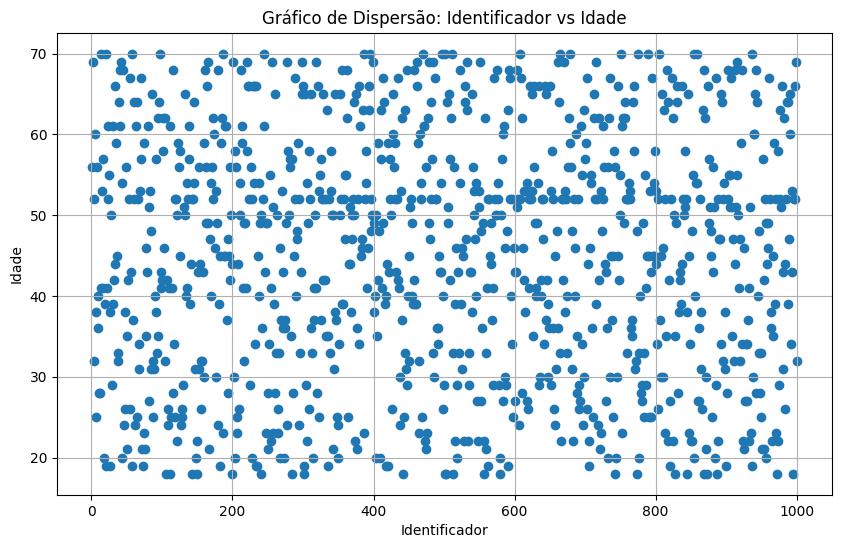

In [ ]:
# Exibir Metadados
print("\nTipos de Dados das Colunas:")
print(dataset.dtypes)

# Plotar
plt.figure(figsize=(10, 6))
plt.scatter(dataset['ID'], dataset['Idade'])
plt.xlabel('Identificador')
plt.ylabel('Idade')
plt.title('Gráfico de Dispersão: Identificador vs Idade')
plt.grid(True)
plt.show()

## Etapa 6: Identificação dos Outliers

### Calcular Contaminação

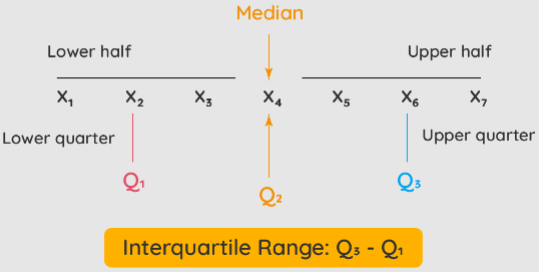

Para calcular o percentual de contaminação de outliers em um dataset, se pode usar o método InterQuartile Range (IQR) que serve para identificar os valores atípicos em cada coluna numérica. O IQR define outliers como valores que estão:

Abaixo de Q1 - 1.5 x IQR

ou

Acima de Q3 + 1.5 x IQR

In [ ]:
# Definir o limite
limite = 0.5

# Selecionar apenas colunas numéricas
numeric_cols = dataset.select_dtypes(include='number')

# Inicializar contador de outliers
outlier_counts = 0
total_values = numeric_cols.size

# Detectar outliers usando o método IQR para cada coluna numérica
for col in numeric_cols.columns:
    Q1 = numeric_cols[col].quantile(0.25)
    Q3 = numeric_cols[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - limite * IQR
    upper_bound = Q3 + limite * IQR

    # Contar outliers
    col_outliers = numeric_cols[(numeric_cols[col] < lower_bound) | (numeric_cols[col] > upper_bound)][col].count()
    outlier_counts += col_outliers
    print(f"Coluna '{col}' - Outliers: {col_outliers} ({(col_outliers / len(dataset) * 100):.2f}%)")

# Calcular o percentual de contaminação de outliers no dataset
outlier_percentage = (outlier_counts / total_values) * 100

print(f"\nPercentual de contaminação de outliers no dataset: {outlier_percentage:.2f}%")
print(f"Valor de contaminação de outliers no dataset: {outlier_percentage/100:.4f}")

Coluna 'ID' - Outliers: 0 (0.00%)
Coluna 'Idade' - Outliers: 82 (8.20%)
Coluna 'Renda_Anual' - Outliers: 105 (10.50%)
Coluna 'Valor_Emprestimo' - Outliers: 18 (1.80%)
Coluna 'Duracao_Emprestimo' - Outliers: 0 (0.00%)
Coluna 'Pontuacao_Credito' - Outliers: 0 (0.00%)
Coluna 'Inadimplencias_Anteriores' - Outliers: 0 (0.00%)

Percentual de contaminação de outliers no dataset: 2.93%
Valor de contaminação de outliers no dataset: 0.0293


### Interpretação do Boxplot

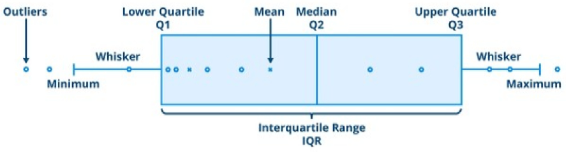

Boxplot da variável "Renda_Anual":

Mediana (linha laranja no meio da caixa): representa a mediana da renda anual, ficando um pouco abaixo de RS 400.000,00, o que indica que 50% das rendas estão abaixo desse valor e 50% estão acima.

Quartis (Q1 e Q3): a parte inferior da caixa representa o primeiro quartil (Q1), que é o valor abaixo do qual estão 25% dos dados e a parte superior da caixa representa o terceiro quartil (Q3), que é o valor abaixo do qual estão 75% dos dados.

Intervalo Interquartil (IQR): é a altura da caixa representa, que representa a diferença entre Q3 e Q1. Esse intervalo cobre os 50% centrais dos dados.

Limites (Bigodes): são as linhas verticais que se estendem até os valores que estão dentro de 1.5 x IQR de Q1 e Q3, sendo os limites para valores considerados "normais", pois os valores fora desses limites são considerados outliers.

Outliers (círculos acima da caixa): serve para indicar que existem valores de renda anual como outliers, sendo rendas que estão bem acima da maioria dos dados, sendo assim, considerados valores extremos. Esses pontos representam indivíduos (observações) com rendas anuais muito acima do restante do conjunto de dados.

O Boxplot informa que a maioria das rendas anuais estam concentrada em um intervalo próximo de RS 200.000,00 a RS 400.000,00. Mas, há várias observações que possuem renda bem mais alta, com valores próximos de 1.2 milhão, que são consideradas outliers nesse contexto, indicando assimetria para cima, onde alguns poucos valores de renda muito altos distorcem a distribuição.

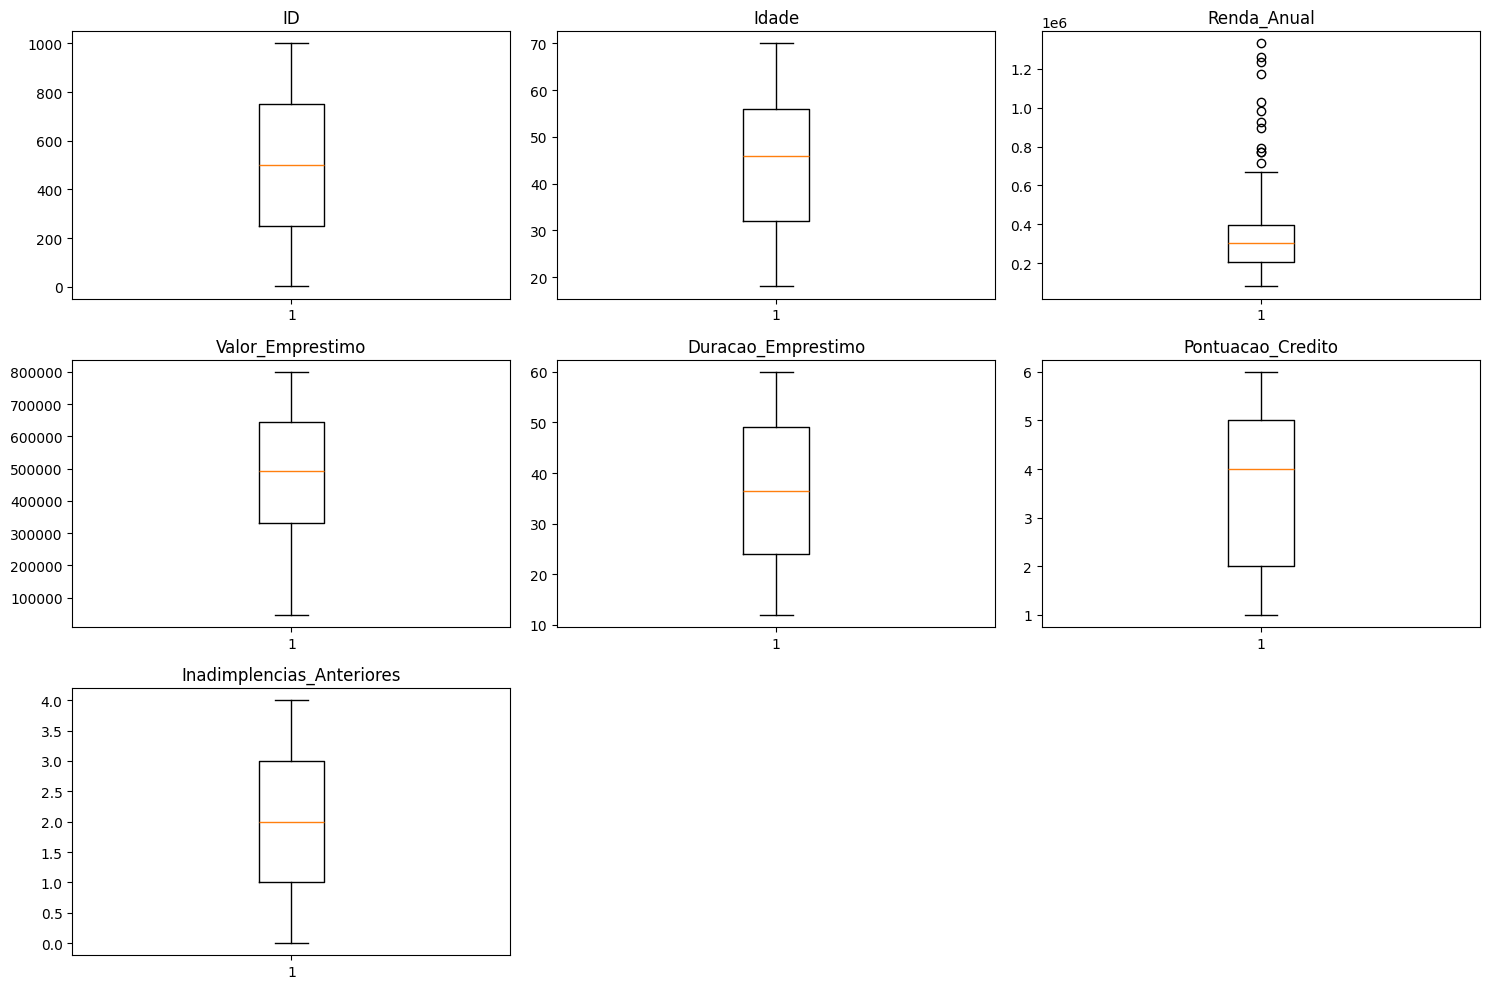

In [ ]:
# Criar boxplot para cada coluna numérica para visualizar outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(dataset.select_dtypes(include='number').columns):
    plt.subplot(3, 3, i + 1)
    plt.boxplot(dataset[col])
    plt.title(col)

plt.tight_layout()
plt.show()

### Visualização da distribuição dos dados outliers e inliers

Como o Isolation Forest Funciona

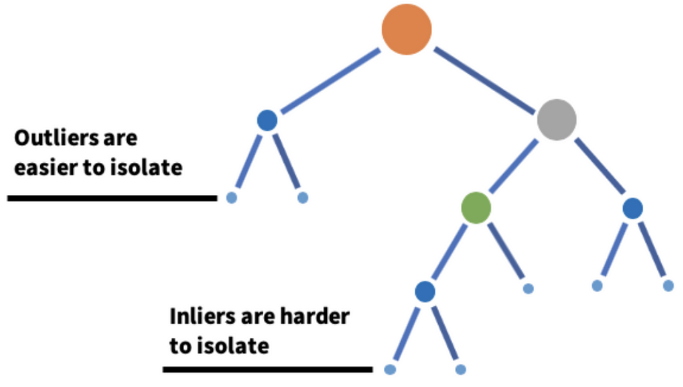

O Isolation Forest é um algoritmo de detecção de anomalias que funciona isolando observações "estranhas" ou "diferentes" dos dados normais. Em vez de modelar as características dos dados normais, o Isolation Forest identifica anomalias de maneira direta, isolando os pontos que estão "distantes" dos outros. É baseado na ideia de que pontos de anomalia devem ser mais fáceis de isolar que os pontos normais.

Construção de Árvores Aleatórias:

O algoritmo começa criando uma floresta de árvores de isolamento. Cada árvore é construída de forma aleatória, e cada divisão (ou split) da árvore separa os dados em diferentes segmentos.
A cada divisão, um recurso (feature) é escolhido aleatoriamente, e o ponto de divisão dentro desse recurso também é escolhido de forma aleatória entre o valor mínimo e máximo da amostra.
Isolamento das Observações:

O processo de divisão continua até que todas as observações estejam isoladas em nós folhas ou até que a profundidade máxima da árvore seja atingida.
Como as anomalias geralmente estão "distantes" do restante dos dados, elas tendem a ser isoladas rapidamente nas árvores. Em outras palavras, as anomalias precisam de menos divisões para serem isoladas.

Cálculo do Score de Anomalia:

Cada ponto recebe um "score de anomalia" com base no número médio de divisões (profundidade média) necessárias para isolá-lo. Quanto menos divisões forem necessárias para isolar um ponto, maior será a probabilidade de ele ser uma anomalia.
O score é calculado em uma escala de 0 a 1. Valores próximos de 1 indicam anomalias prováveis, enquanto valores próximos de 0 indicam observações normais.
Interpretação do Score:

Com base nos scores de anomalia, é possível definir um limiar. Observações com scores acima do limiar são classificadas como anomalias, enquanto as demais são consideradas normais.

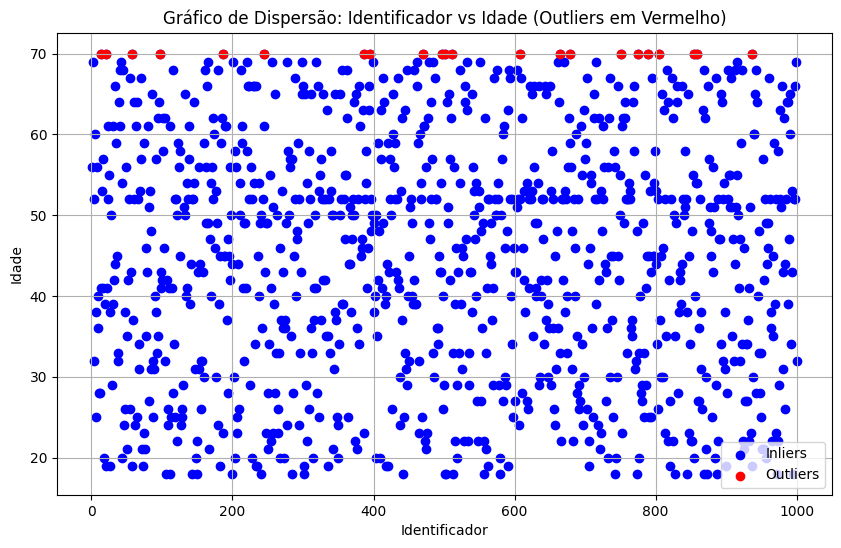

In [ ]:
# Criar modelo IsolationForest para detectar outliers
model = IsolationForest(contamination=outlier_percentage/100)  # Ajustar a contaminação conforme necessário
model.fit(dataset[['Idade']])

# Prever se cada ponto é um outlier (-1) ou um inlier (1)
outlier_predictions = model.predict(dataset[['Idade']])

# Criar um gráfico de dispersão com os outliers destacados
plt.figure(figsize=(10, 6))
plt.scatter(dataset['ID'], dataset['Idade'], color='blue', label='Inliers')
plt.scatter(dataset['ID'][outlier_predictions == -1], dataset['Idade'][outlier_predictions == -1], color='red', label='Outliers')
plt.xlabel('Identificador')
plt.ylabel('Idade')
plt.title('Gráfico de Dispersão: Identificador vs Idade (Outliers em Vermelho)')
plt.legend()
plt.grid(True)
plt.show()

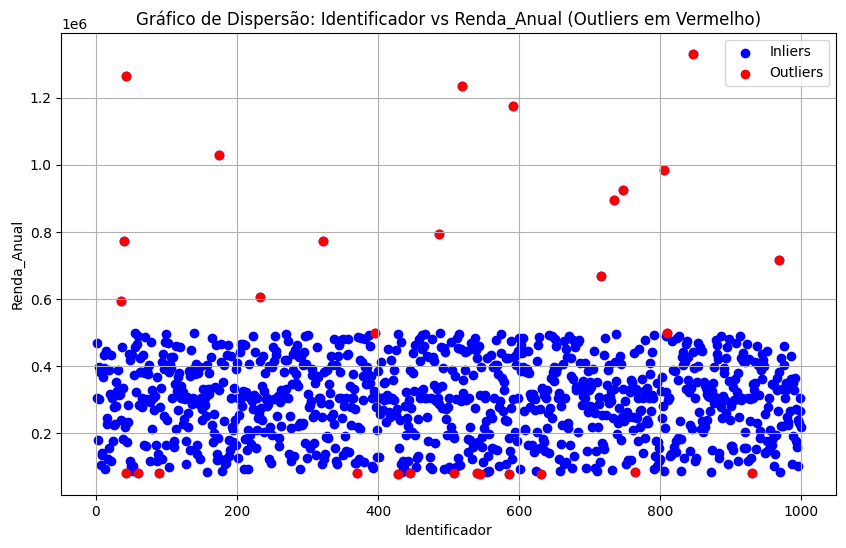

In [ ]:
# Criar modelo IsolationForest para detectar outliers
model = IsolationForest(contamination=outlier_percentage/100)  # Ajustar a contaminação conforme necessário
model.fit(dataset[['Renda_Anual']])

# Prever se cada ponto é um outlier (-1) ou um inlier (1)
outlier_predictions = model.predict(dataset[['Renda_Anual']])

# Criar gráfico de dispersão com os outliers destacados
plt.figure(figsize=(10, 6))
plt.scatter(dataset['ID'], dataset['Renda_Anual'], color='blue', label='Inliers')
plt.scatter(dataset['ID'][outlier_predictions == -1], dataset['Renda_Anual'][outlier_predictions == -1], color='red', label='Outliers')
plt.xlabel('Identificador')
plt.ylabel('Renda_Anual')
plt.title('Gráfico de Dispersão: Identificador vs Renda_Anual (Outliers em Vermelho)')
plt.legend()
plt.grid(True)
plt.show()

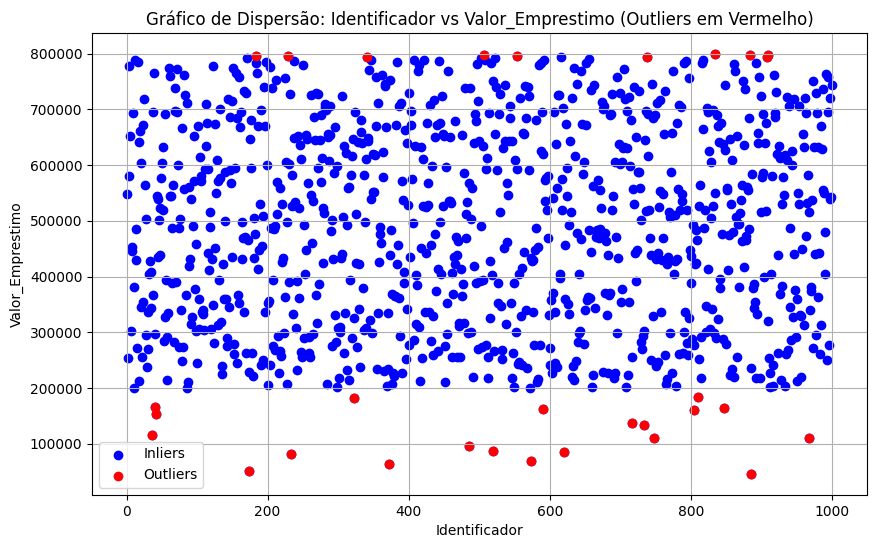

In [ ]:
# Criar modelo IsolationForest para detectar outliers
model = IsolationForest(contamination=outlier_percentage/100)  # Ajustar a contaminação conforme necessário
model.fit(dataset[['Valor_Emprestimo']])

# Prever se cada ponto é um outlier (-1) ou um inlier (1)
outlier_predictions = model.predict(dataset[['Valor_Emprestimo']])

# Criar gráfico de dispersão com os outliers destacados
plt.figure(figsize=(10, 6))
plt.scatter(dataset['ID'], dataset['Valor_Emprestimo'], color='blue', label='Inliers')
plt.scatter(dataset['ID'][outlier_predictions == -1], dataset['Valor_Emprestimo'][outlier_predictions == -1], color='red', label='Outliers')
plt.xlabel('Identificador')
plt.ylabel('Valor_Emprestimo')
plt.title('Gráfico de Dispersão: Identificador vs Valor_Emprestimo (Outliers em Vermelho)')
plt.legend()
plt.grid(True)
plt.show()

### Separação dos Outliers dos Inliers

In [ ]:
# Selecionar apenas colunas numéricas para a detecção de outliers
numeric_data = dataset.select_dtypes(include='number')

# Configurar e aplicar o Isolation Forest com contaminação
iso_forest = IsolationForest(contamination=outlier_percentage/100, random_state=42)
outlier_labels = iso_forest.fit_predict(numeric_data)

# Adicionar os rótulos de outliers ao dataset
dataset['is_outlier'] = outlier_labels

# Filtrar apenas os outliers (rótulo -1)
outliers = dataset[dataset['is_outlier'] == -1]

# Exibir os dados que são outliers
print("Dados identificados como outliers:")
print(outliers.to_string())

# Exibir a quantidade e percentual de outliers detectados
outlier_count = len(outliers)
outlier_percentage = (outlier_count / len(dataset)) * 100
print(f"\nTotal de outliers: {outlier_count} ({outlier_percentage:.2f}%)")


Dados identificados como outliers:
      ID  Idade  Renda_Anual  Valor_Emprestimo  Duracao_Emprestimo  Pontuacao_Credito  Inadimplencias_Anteriores  is_outlier
1      2   69.0    468097.54         253260.44                  30                1.0                          1          -1
35    36   45.0    593319.49         116262.79                  30                2.0                          4          -1
39    40   68.0    774039.56         166407.17                  28                6.0                          4          -1
41    42   69.0   1263424.35         154400.96                  59                5.0                          0          -1
57    58   19.0    465306.16         292274.69                  48                2.0                          0          -1
61    62   24.0    383616.36         759638.44                  13                3.0                          0          -1
70    71   57.0    163792.91         771678.52                  56                1.0     

In [ ]:
# Remover os outliers
try:
    dataset = dataset[dataset['is_outlier'] == 1].drop(columns=['is_outlier'])
except Exception as e:
    print(f"Ocorreu um erro: {e}")

# Exibir o dataset sem os outliers
print("Dataset sem os outliers:")
print(dataset.to_string())

# Exibir informações gerais do dataset
print("\nInformações Gerais do Dataset:")
print(dataset.info())

Dataset sem os outliers:
       ID  Idade    Renda_Anual  Valor_Emprestimo  Duracao_Emprestimo  Pontuacao_Credito  Inadimplencias_Anteriores
0       1   56.0  305368.070000         548285.00                  24                5.0                          3
2       3   52.0  179168.940000         776999.44                  60                6.0                          1
3       4   32.0  399181.270000         580976.03                  17                1.0                          2
4       5   60.0  303131.620000         652902.69                  59                3.0                          2
5       6   25.0  382616.750000         302286.76                  23                4.0                          2
6       7   38.0  106183.370000         445686.71                  48                3.0                          3
7       8   56.0  142050.420000         453613.47                  28                6.0                          3
8       9   36.0  135909.110000         693083.

## Etapa 7: Definição das Regras

In [ ]:
# Transformar o atributo Pontuação de Crédito de contínuo para discreto
dataset['Pontuacao_Credito'] = pd.cut(
    dataset['Pontuacao_Credito'],
    bins=[0, 1, 3, 5, 6],  # Define os intervalos
    labels=['AltoRisco', 'MédioRisco', 'BaixoRisco', 'SemRisco'],
    include_lowest=True
)

In [ ]:
# Atualizar 'credit.csv' com os dados do dataset
dataset.to_csv('credit.csv', index=False)

In [ ]:
# Definir o atributo 'Pontuacao_Credito' como target
target = dataset['Pontuacao_Credito']

# Definir o atributo 'ID' como meta
meta = dataset['ID']

# Definir os atributos restantes como features
features = dataset.drop(['Pontuacao_Credito', 'ID'], axis=1)

# Exibir as regras para cada atributo
print("Regras para Atributos:")

# ID (Meta): Identificador único para cada cliente.
print(" - ID (Meta): Identificador único para cada cliente, numérico e sequencial.")

# Idade (Feature):
print(" - Idade (Feature): Idade do cliente em anos, entre 18 e 70.")

# Renda_Anual (Feature):
print(" - Renda_Anual (Feature): Renda anual do cliente em reais, entre RS 80.000,00 e RS 500.000,00.")

# Valor_Emprestimo (Feature):
print(" - Valor_Emprestimo (Feature): Valor do empréstimo em reais, entre RS 200.000,00 e RS 800.000,00.")

# Duracao_Emprestimo (Feature):
print(" - Duracao_Emprestimo (Feature): Duração do empréstimo em meses, entre 12 e 60.")

# Inadimplencias_Anteriores (Feature):
print(" - Inadimplencias_Anteriores (Feature): Número de inadimplências anteriores, entre 0 e 4.")

# Pontuacao_Credito (Target):
print(" - Pontuacao_Credito (Target): Pontuação de crédito do cliente, entre SemRisco, BaixoRisco, MédioRisco e AltoRisco.")


Regras para Atributos:
 - ID (Meta): Identificador único para cada cliente, numérico e sequencial.
 - Idade (Feature): Idade do cliente em anos, entre 18 e 70.
 - Renda_Anual (Feature): Renda anual do cliente em reais, entre RS 80.000,00 e RS 500.000,00.
 - Valor_Emprestimo (Feature): Valor do empréstimo em reais, entre RS 200.000,00 e RS 800.000,00.
 - Duracao_Emprestimo (Feature): Duração do empréstimo em meses, entre 12 e 60.
 - Inadimplencias_Anteriores (Feature): Número de inadimplências anteriores, entre 0 e 4.
 - Pontuacao_Credito (Target): Pontuação de crédito do cliente, entre SemRisco, BaixoRisco, MédioRisco e AltoRisco.


In [ ]:
# Contar a quantidade de exemplos por classe no atributo 'Pontuacao_Credito'
target_counts = target.value_counts()

print("\nQuantidade de Exemplos por Classe Alvo:")
target_counts


Quantidade de Exemplos por Classe Alvo:


,count
Pontuacao_Credito,
MédioRisco,314
BaixoRisco,305
SemRisco,212
AltoRisco,139


## Etapa 8: Balanceamento dos Dados

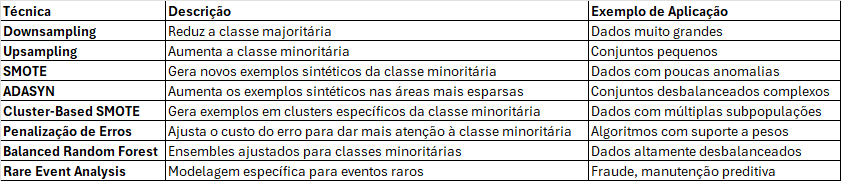

In [ ]:
# Contar a quantidade de exemplos por classe no atributo 'Pontuacao_Credito'
target_counts = target.value_counts()

# Encontrar a classe minoritária
minority_class = target_counts.idxmin()

# Encontrar a quantidade de exemplos da classe minoritária
n_samples_minority = target_counts.min()

# Criar um DataFrame vazio para armazenar o conjunto de dados balanceado
balanced_dataset = pd.DataFrame()

# Balancear os dados para cada classe
for class_label in target_counts.index:
  # Filtrar os dados para a classe atual
  class_data = dataset[dataset['Pontuacao_Credito'] == class_label]

  # Se a classe for a minoritária, manter todos os exemplos
  if class_label == minority_class:
    balanced_dataset = pd.concat([balanced_dataset, class_data])
  else:
    # Se a classe for a majoritária, fazer o downsample para o número de exemplos da classe minoritária
    downsampled_class_data = resample(class_data,
                                     replace=False,
                                     n_samples=n_samples_minority,
                                     random_state=42)
    balanced_dataset = pd.concat([balanced_dataset, downsampled_class_data])

# Redefinir o índice do conjunto de dados balanceado
balanced_dataset = balanced_dataset.reset_index(drop=True)

# Exibir a quantidade de exemplos por classe no conjunto de dados balanceado
print("\nQuantidade de Exemplos por Classe Alvo (Dataset Balanceado):")
print(balanced_dataset['Pontuacao_Credito'].value_counts())


Quantidade de Exemplos por Classe Alvo (Dataset Balanceado):
Pontuacao_Credito
AltoRisco     139
MédioRisco    139
BaixoRisco    139
SemRisco      139
Name: count, dtype: int64


## Etapa 9: Normalização dos Dados

In [ ]:
# Separar as colunas target e meta das demais features
target = balanced_dataset['Pontuacao_Credito']
meta = balanced_dataset['ID']
features = balanced_dataset.drop(['Pontuacao_Credito', 'ID'], axis=1)

# Criar um objeto MinMaxScaler
scaler = MinMaxScaler()

# Normalizar as features
normalized_features = scaler.fit_transform(features)

# Converter o array numpy em DataFrame
normalized_features_df = pd.DataFrame(normalized_features, columns=features.columns)

# Criar um novo dataset com a ordem target, meta e demais atributos
dataset = pd.concat([target, meta, normalized_features_df], axis=1)

print(dataset.head().to_string())

  Pontuacao_Credito   ID     Idade  Renda_Anual  Valor_Emprestimo  Duracao_Emprestimo  Inadimplencias_Anteriores
0        MédioRisco  401  0.596154     0.324339          0.903432            0.083333                       0.50
1        MédioRisco  104  0.269231     0.028536          0.746959            0.770833                       0.25
2        MédioRisco  703  0.942308     0.198859          0.422632            0.583333                       0.00
3        MédioRisco  187  0.096154     0.551524          0.470361            0.645833                       0.25
4        MédioRisco  834  0.480769     0.067954          0.657737            0.062500                       1.00


## Etapa 10: Separação dos Dados para Treinamento/Teste e Validação

In [ ]:
# Carregar o dataset
dataset = pd.read_csv('credit.csv')

# Separar os dados em treino e teste (80/20)
train_data, test_data = train_test_split(dataset, test_size=0.2, random_state=42)

# Salvar os datasets em novos arquivos CSV
train_data.to_csv('credit_train.csv', index=False)
test_data.to_csv('credit_test.csv', index=False)

# Exibir informações
print("Datasets de treino e teste gerados com sucesso!")
print(f"Arquivo de treino: credit_train.csv ({len(train_data)} registros)")
print(f"Arquivo de teste: credit_test.csv ({len(test_data)} registros)")

Datasets de treino e teste gerados com sucesso!
Arquivo de treino: credit_train.csv (776 registros)
Arquivo de teste: credit_test.csv (194 registros)


In [ ]:
# Carregar o dataset de treino
credit_train = pd.read_csv('credit_train.csv')

# Exibir o número de linhas e colunas
print("Dimensões do Dataset (Linhas, Colunas):")
print(credit_train.shape)

# Carregar o dataset de teste
credit_test = pd.read_csv('credit_test.csv')

# Exibir o número de linhas e colunas
print("Dimensões do Dataset (Linhas, Colunas):")
print(credit_test.shape)

Dimensões do Dataset (Linhas, Colunas):
(776, 7)
Dimensões do Dataset (Linhas, Colunas):
(194, 7)


## Etapa 11: Treinamento dos Modelos

### Support Vector Machine (SVM)


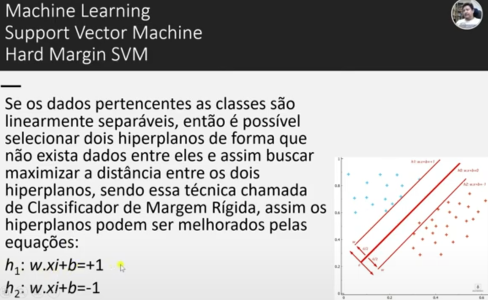

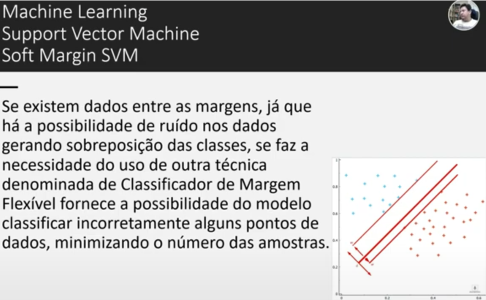

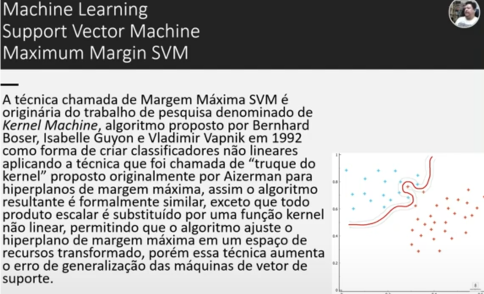

[Explicação do SVM](https://youtu.be/UrR5tcY-wYw)

In [ ]:
# Criar modelo SVM com hiperparâmetros específicos
svm_model = SVC(
    C=1.0,  # Parâmetro de regularização (custo da classificação incorreta)
    kernel='rbf',  # Kernel para o modelo (radial basis function)
    degree=3,  # Grau do polinômio para o kernel (relevante para kernel='poly')
    gamma='scale',  # Coeficiente do kernel (relevante para kernel='rbf', 'poly', 'sigmoid')
    coef0=0.0,  # Termo independente para o kernel (relevante para kernel='poly', 'sigmoid')
    shrinking=True,  # Utilização do shrinking heuristic para otimizar a solução
    probability=False,  # Calcular probabilidades de classe
    tol=0.001,  # Tolerância para a otimização
    cache_size=200,  # Tamanho do cache em MB
    class_weight=None,  # Pesos para as classes (pode ser usado para lidar com classes desbalanceadas)
    verbose=False,  # Mostrar mensagens durante a execução
    max_iter=200,  # Número máximo de iterações para a otimização (-1 significa ilimitado)
    decision_function_shape='ovr',  # Formato da função de decisão ('ovo' para one-vs-one, 'ovr' para one-vs-rest)
    break_ties=False,  # Quebrar empates com maior precisão (relevante para classificação multiclasse)
    random_state=None  # Semente aleatória para reprodutibilidade
)

# Exibir os hiperparâmetros
print("Hiperparâmetros do modelo SVM:")
print(svm_model.get_params())

Hiperparâmetros do modelo SVM:
{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': 200, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [ ]:
# Carregar o dataset de treino
credit_train = pd.read_csv('credit_train.csv')

# Separar as features e o target
x = credit_train.drop(['Pontuacao_Credito', 'ID'], axis=1)
y = credit_train['Pontuacao_Credito']

# Criar o modelo SVM
svm_model = SVC()

# Definir o número de folds para cross-validation
n_splits = 3

# Criar o objeto StratifiedKFold para garantir que a distribuição das classes seja mantida em cada fold
stratified_kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Realizar a cross-validation
cv_scores_accuracy = cross_val_score(svm_model, x, y, cv=stratified_kf, scoring='accuracy')
cv_scores_recall = cross_val_score(svm_model, x, y, cv=stratified_kf, scoring='recall_weighted')
cv_scores_f1 = cross_val_score(svm_model, x, y, cv=stratified_kf, scoring='f1_weighted')

# Exibir as métricas de classificação
print("\nMétricas de Classificação (Cross-Validation):")
print(f"Acurácia: {cv_scores_accuracy.mean():.4f}")
print(f"Recall: {cv_scores_recall.mean():.4f}")
print(f"F1-Score: {cv_scores_f1.mean():.4f}")


Métricas de Classificação (Cross-Validation):
Acurácia: 0.3299
Recall: 0.3299
F1-Score: 0.2440


In [ ]:
# Treinar o modelo SVM (substitua pelo seu modelo treinado)
svm_model = SVC()
svm_model.fit(x, y)

# Salvar o modelo treinado em um arquivo
filename = 'svm_model.sav'
pickle.dump(svm_model, open(filename, 'wb'))

print(f"Modelo salvo em '{filename}'")

Modelo salvo em 'svm_model.sav'


In [ ]:
# Carregar o modelo treinado
filename = 'svm_model.sav'
loaded_model = pickle.load(open(filename, 'rb'))

# Carregar o dataset de teste
credit_test = pd.read_csv('credit_test.csv')

# Separar as features e o target
X_test = credit_test.drop(['Pontuacao_Credito', 'ID'], axis=1)
y_test = credit_test['Pontuacao_Credito']

# Fazer as previsões usando o modelo carregado
y_pred = loaded_model.predict(X_test)

# Calcular as métricas de avaliação
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Exibir as métricas de avaliação
print("Métricas de Avaliação no Dataset de Teste:")
print(f"Acurácia: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}\n")

Métricas de Avaliação no Dataset de Teste:
Acurácia: 0.3351
Recall: 0.3351
F1-Score: 0.2385



### Multilayer Perceptron (MLP)

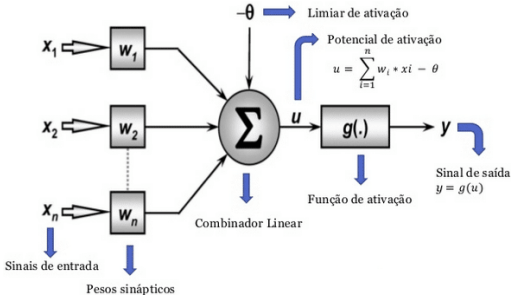

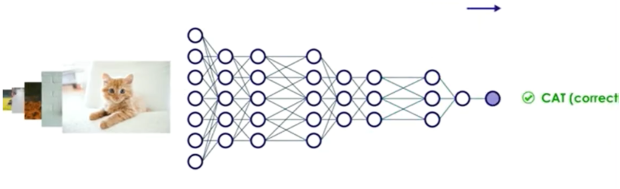

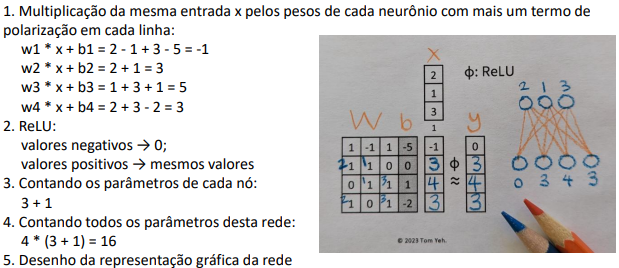

[Explicação do MLP](https://youtu.be/oivb9285i54)

In [ ]:
# Criar um modelo MLP com hiperparâmetros específicos
mlp_model = MLPClassifier(
    hidden_layer_sizes=(100,),  # Número de neurônios em cada camada oculta
    activation='relu',  # Função de ativação
    solver='adam',  # Algoritmo de otimização
    alpha=0.0001,  # Termo de regularização L2
    batch_size='auto',  # Tamanho do batch para o treinamento
    learning_rate='constant',  # Taxa de aprendizado
    learning_rate_init=0.001,  # Taxa de aprendizado inicial
    power_t=0.5,  # Parâmetro para o algoritmo de otimização 'sgd'
    max_iter=200,  # Número máximo de iterações
    shuffle=True,  # Embaralhar os dados a cada época
    random_state=None,  # Semente aleatória
    tol=0.0001,  # Tolerância para o critério de parada
    verbose=False,  # Mostrar mensagens durante o treinamento
    warm_start=False,  # Reutilizar a solução da inicialização anterior
    momentum=0.9,  # Parâmetro para o algoritmo de otimização 'sgd'
    nesterovs_momentum=True,  # Utilizar o momentum de Nesterov
    early_stopping=False,  # Parar o treinamento precocemente
    validation_fraction=0.1,  # Fração de dados para validação
    beta_1=0.9,  # Parâmetro para o algoritmo de otimização 'adam'
    beta_2=0.999,  # Parâmetro para o algoritmo de otimização 'adam'
    epsilon=1e-08,  # Parâmetro para o algoritmo de otimização 'adam'
    n_iter_no_change=10,  # Número máximo de épocas sem melhoria
    max_fun=15000  # Número máximo de chamadas para a função de custo
)

# Exibir os hiperparâmetros
print("Hiperparâmetros do modelo MLP:")
print(mlp_model.get_params())

Hiperparâmetros do modelo MLP:
{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


In [ ]:
# Carregar o dataset de treino
credit_train = pd.read_csv('credit_train.csv')

# Separar as features e o target
X = credit_train.drop(['Pontuacao_Credito', 'ID'], axis=1)
y = credit_train['Pontuacao_Credito']

# Criar o modelo MLP
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)

# Definir o número de folds para cross-validation
n_splits = 3

# Criar o objeto StratifiedKFold para garantir que a distribuição das classes seja mantida em cada fold
stratified_kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Realizar a cross-validation
cv_scores_accuracy = cross_val_score(mlp_model, X, y, cv=stratified_kf, scoring='accuracy')
cv_scores_recall = cross_val_score(mlp_model, X, y, cv=stratified_kf, scoring='recall_weighted')
cv_scores_f1 = cross_val_score(mlp_model, X, y, cv=stratified_kf, scoring='f1_weighted')

# Exibir as métricas de classificação
print("\nMétricas de Classificação (Cross-Validation - MLP):")
print(f"Acurácia: {cv_scores_accuracy.mean():.4f}")
print(f"Recall: {cv_scores_recall.mean():.4f}")
print(f"F1-Score: {cv_scores_f1.mean():.4f}")


Métricas de Classificação (Cross-Validation - MLP):
Acurácia: 0.2603
Recall: 0.2603
F1-Score: 0.2188


In [ ]:
# Treinar o modelo SVM (substitua pelo seu modelo treinado)
mlp_model = MLPClassifier()
mlp_model.fit(X, y)

# Salvar o modelo treinado em um arquivo
filename = 'mlp_model.sav'
pickle.dump(mlp_model, open(filename, 'wb'))

print(f"Modelo salvo em '{filename}'")

Modelo salvo em 'mlp_model.sav'


In [ ]:
# Carregar o modelo treinado
filename = 'mlp_model.sav'
loaded_model = pickle.load(open(filename, 'rb'))

# Carregar o dataset de teste
credit_test = pd.read_csv('credit_test.csv')

# Separar as features e o target do dataset de teste
X_test = credit_test.drop(['Pontuacao_Credito', 'ID'], axis=1)
y_test = credit_test['Pontuacao_Credito']

# Fazer as previsões usando o modelo carregado
y_pred = loaded_model.predict(X_test)

# Calcular as métricas de avaliação
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Exibir as métricas de avaliação
print("Métricas de Avaliação no Dataset de Teste (MLP):")
print(f"Acurácia: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}\n")

Métricas de Avaliação no Dataset de Teste (MLP):
Acurácia: 0.2938
Recall: 0.2938
F1-Score: 0.2185



## Etapa 12: Competição de modelos

## Etapa 12: Produção

In [ ]:
# Carregar o modelo treinado (SVM)
filename = 'svm_model.sav'
loaded_model = pickle.load(open(filename, 'rb'))

# Criar um dicionário com os valores de entrada
input_data = {
    'Idade': 18,  # Exemplo de valor para Idade
    'Renda_Anual': 1000,  # Exemplo de valor para Renda_Anual
    'Valor_Emprestimo': 100000,  # Exemplo de valor para Valor_Emprestimo
    'Duracao_Emprestimo': 12,  # Exemplo de valor para Duracao_Emprestimo
    'Inadimplencias_Anteriores': 0  # Exemplo de valor para Inadimplencias_Anteriores
}

# Converter o dicionário em um DataFrame
input_df = pd.DataFrame([input_data])

# Normalizar os dados de entrada usando o mesmo scaler utilizado no treinamento
scaler = MinMaxScaler()
normalized_input = scaler.fit_transform(features)
normalized_input_df = pd.DataFrame(normalized_input, columns=features.columns)


# Fazer a previsão usando o modelo carregado
prediction = loaded_model.predict(input_df)

# Exibir a previsão
print("Previsão do Potencial de Risco:")
prediction[0]

Previsão do Potencial de Risco:


'BaixoRisco'